In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "/Users/alijazibrizvi/Documents/Data Analytics/Self-Project | Social Science & Demography/ProjectData.xlsm"

# Loading the Excel file
excel_file = pd.ExcelFile(file_path)

# Creating an Empty Dictionary to Store DataFrames
dfs = {}

# Looping through each Sheet and Storing the Data in separate DataFrames
for i, sheet_name in enumerate(excel_file.sheet_names):
    # Creating a DataFrame for each Sheet
    dfs[f'df{i+1}'] = pd.read_excel(file_path, sheet_name=sheet_name)

# Defining each Sheet (6 in Total) to a Variable
df1, df2, df3, df4, df5, df6 = [dfs[f'df{i+1}'] for i in range(6)]

In [47]:
# Confirming the Option to Display 10 Maximum Rows and Columns - Originally intended to Display all, but it was
# becoming too much, so:
pd.set_option('display.max_rows', 10)  # Show 10 rows
pd.set_option('display.max_columns', 10)  # Show 10 columns

In [4]:
# Removing the "Case Check" column from all DataFrames as it is of no use, now
dataframes = [df1, df2, df3, df4, df5, df6]

for i, df in enumerate(dataframes):
    if 'Case Check' in df.columns:
        dataframes[i] = df.drop('Case Check', axis=1)

# # The more Ensuring Way:
## Drop the 'Case Check' column
df1.drop(columns=['Case Check'], inplace=True)
df2.drop(columns=['Case Check'], inplace=True)
df3.drop(columns=['Case Check'], inplace=True)
df4.drop(columns=['Case Check'], inplace=True)
df5.drop(columns=['Case Check'], inplace=True)
df6.drop(columns=['Case Check'], inplace=True)

### Exploratory Data Analysis (EDA)

In [66]:
df1.groupby("Code").get_group("AFG")

In [73]:
df5.info()

In [72]:
print(df5.columns)

In [7]:
df5[['Total fisheries production (metric tons)',
       'Arable land | 00006621 || Area | 005110 || hectares',
       'Population (historical)', 'Gas production (TWh)',
       'Coal production (TWh)', 'Primary energy consumption (TWh)',
       'GDP per Capita ($)', 'Freshwater use',
       'Meat, total | 00001765 || Production | 005510 || tonnes',
       'Total | 00002901 || Food available for consumption | 000664 || kilocalories per day',
       'Agricultural land | 00006610 || Area | 005110 || hectares',
       'Oil production - Mt',
       'Cereals | 00001717 || Yield | 005419 || tonnes per hectare',
       'Annual CO2 Emissions']] = df5[['Total fisheries production (metric tons)',
       'Arable land | 00006621 || Area | 005110 || hectares',
       'Population (historical)', 'Gas production (TWh)',
       'Coal production (TWh)', 'Primary energy consumption (TWh)',
       'GDP per Capita ($)', 'Freshwater use',
       'Meat, total | 00001765 || Production | 005510 || tonnes',
       'Total | 00002901 || Food available for consumption | 000664 || kilocalories per day',
       'Agricultural land | 00006610 || Area | 005110 || hectares',
       'Oil production - Mt',
       'Cereals | 00001717 || Yield | 005419 || tonnes per hectare',
       'Annual CO2 Emissions']].astype('float64')

In [8]:
df5[['Total fisheries production (metric tons)',
       'Arable land | 00006621 || Area | 005110 || hectares',
       'Population (historical)', 'Gas production (TWh)',
       'Coal production (TWh)', 'Primary energy consumption (TWh)',
       'GDP per Capita ($)', '900793-annotations', 'Freshwater use',
       'Meat, total | 00001765 || Production | 005510 || tonnes',
       'Total | 00002901 || Food available for consumption | 000664 || kilocalories per day',
       'Agricultural land | 00006610 || Area | 005110 || hectares',
       'Oil production - Mt',
       'Cereals | 00001717 || Yield | 005419 || tonnes per hectare',
       'Annual CO2 Emissions']].fillna(0, inplace=True)

/var/folders/j3/3j69h7bd37v9q0182sm6scrh0000gn/T/ipykernel_5694/123533146.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  'Annual CO2 Emissions']].fillna(0, inplace=True)


In [12]:
df5.rename(columns={df5.columns[0]: 'Country'}, inplace=True)

In [70]:
df5["Country"].value_counts()

In [9]:
# Checking to Ensure we do NOT have any NULL values in the "Country" column
df5["Country"].isnull().sum()

0

In [9]:
# Adjusting the "Urban Population" Share column in df1 as well
df1["Urban Population (% of Total Population)"].astype('float64')
df1["Urban Population (% of Total Population)"].fillna(0, inplace=True)

In [67]:
df1.head(7)

In [10]:
# Proceeding to Visualization - Ensure all Duplicates are Removed First
df1.drop_duplicates()

,Country,Code,Year,Mean male height (cm),Mean female height (cm),Urban Population (% of Total Population)
0,Afghanistan,AFG,1896,161.164095,149.187747,0.000
1,Afghanistan,AFG,1897,161.196286,149.321451,0.000
2,Afghanistan,AFG,1898,161.228297,149.455494,0.000
3,Afghanistan,AFG,1899,161.260727,149.589503,0.000
4,Afghanistan,AFG,1900,161.293068,149.723587,0.000
...,...,...,...,...,...,...
21003,Zimbabwe,ZWE,1992,169.340762,158.583941,30.499
21004,Zimbabwe,ZWE,1993,169.152276,158.492266,30.940
21005,Zimbabwe,ZWE,1994,168.963595,158.400025,31.335
21006,Zimbabwe,ZWE,1995,168.774934,158.307779,31.732


In [16]:
# Will Create a Serial Number column for each Country

# Step 1: Extracting Unique Countries and Sorting them
unique_countries = df1['Country'].unique()
sorted_countries = sorted(unique_countries)

# Step 2: Creating a Mapping from Country to Serial Number
country_to_serial = {country: index + 1 for index, country in enumerate(sorted_countries)}

# Step 3: Creating a new column called 'Country Number' based on the Mapping
df1['Country Number'] = df1['Country'].map(country_to_serial)

# Displaying the Updated DataFrame
df1

,Country,Code,Year,Mean male height (cm),Mean female height (cm),Urban Population (% of Total Population),Country Number
0,Afghanistan,AFG,1896,161.164095,149.187747,0.000,1
1,Afghanistan,AFG,1897,161.196286,149.321451,0.000,1
2,Afghanistan,AFG,1898,161.228297,149.455494,0.000,1
3,Afghanistan,AFG,1899,161.260727,149.589503,0.000,1
4,Afghanistan,AFG,1900,161.293068,149.723587,0.000,1
...,...,...,...,...,...,...,...
21003,Zimbabwe,ZWE,1992,169.340762,158.583941,30.499,208
21004,Zimbabwe,ZWE,1993,169.152276,158.492266,30.940,208
21005,Zimbabwe,ZWE,1994,168.963595,158.400025,31.335,208
21006,Zimbabwe,ZWE,1995,168.774934,158.307779,31.732,208


In [65]:
# This will be an Important Check as you will Find out Later on
df1["Year"].nsmallest(5)

In [30]:
# Viewing Countries by Highest to Lowest Average Height for Men

df1_grp = df1.groupby("Country").mean([["Year", "Mean male height (cm)", "Mean female height (cm)", "Urban Population (% of Total Population)"]])
df1_grp.sort_values(by="Mean male height (cm)", ascending=False)

,Year,Mean male height (cm),Mean female height (cm),Urban Population (% of Total Population),Country Number
Country,,,,,
Iceland,1946.0,178.146097,165.102081,31.904990,85.0
Netherlands,1946.0,177.796326,164.548917,23.759297,131.0
Sweden,1946.0,177.122303,164.325229,29.743366,180.0
Norway,1946.0,177.050770,164.145159,24.456347,140.0
Estonia,1946.0,176.718096,163.708235,24.590277,61.0
...,...,...,...,...,...
Cambodia,1946.0,160.148268,151.182439,4.974188,31.0
Philippines,1946.0,160.066252,149.728291,13.971248,149.0
Indonesia,1946.0,159.965993,149.147499,8.341535,87.0


In [36]:
# Viewing Countries by Highest to Lowest Average Height for Women

df1_grp.sort_values(by="Mean female height (cm)", ascending=False)

,Year,Mean male height (cm),Mean female height (cm),Urban Population (% of Total Population),Country Number
Country,,,,,
Iceland,1946.0,178.146097,165.102081,31.904990,85.0
Netherlands,1946.0,177.796326,164.548917,23.759297,131.0
Sweden,1946.0,177.122303,164.325229,29.743366,180.0
Denmark,1946.0,176.658499,164.191544,29.913851,50.0
Norway,1946.0,177.050770,164.145159,24.456347,140.0
...,...,...,...,...,...
Nepal,1946.0,160.304050,149.202793,2.257198,130.0
Indonesia,1946.0,159.965993,149.147499,8.341535,87.0
Peru,1946.0,161.367431,149.043332,22.581307,148.0


### Important Visualizations:

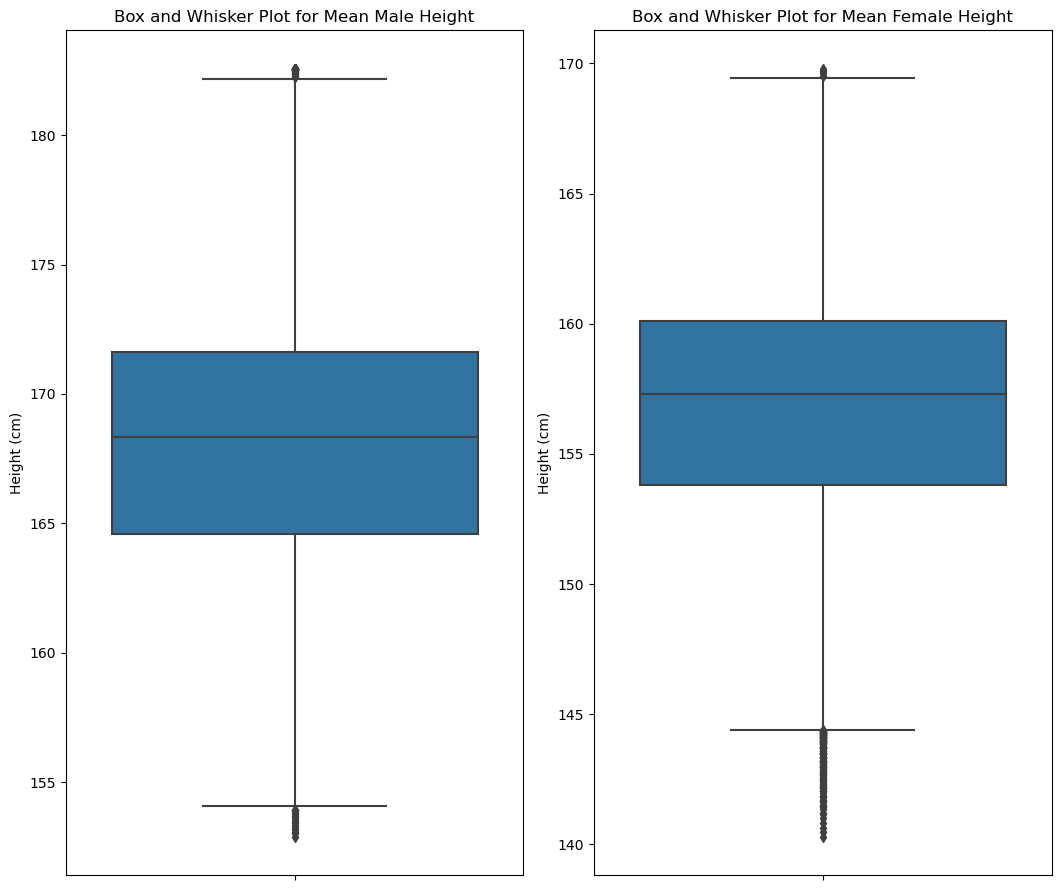

In [55]:
plt.figure(figsize=(16, 9))

# Creating a Box-and-Whisker plot for Mean Male Height
plt.subplot(1, 3, 1)
sns.boxplot(data=df1, y='Mean male height (cm)')
plt.title('Box and Whisker Plot for Mean Male Height')
plt.ylabel('Height (cm)')

# Creating a Box-and-Whisker plot for Mean Female Height
plt.subplot(1, 3, 2)
sns.boxplot(data=df1, y='Mean female height (cm)')
plt.title('Box and Whisker Plot for Mean Female Height')
plt.ylabel('Height (cm)')

# Display the Plots
plt.tight_layout()
plt.show()

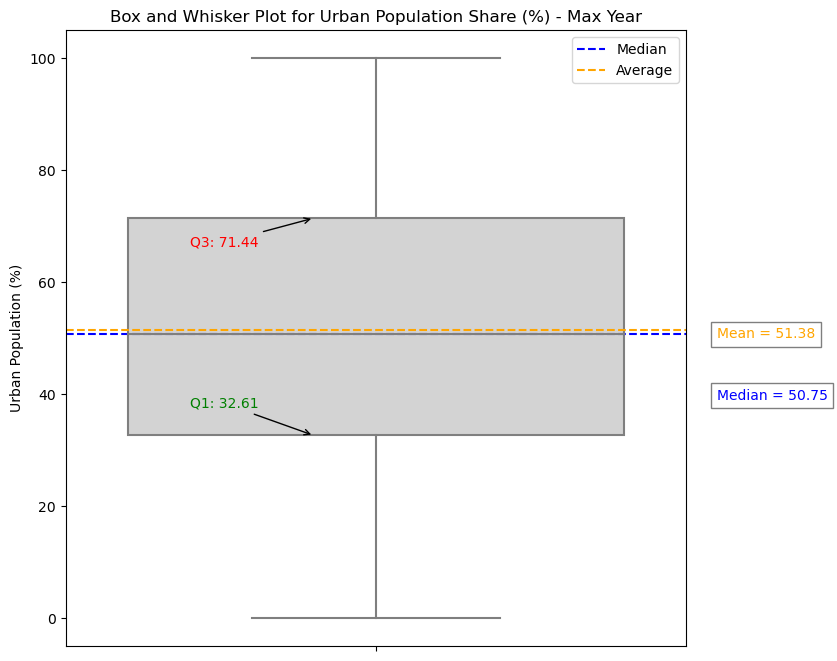

In [88]:
# Creating a Separate Box-and-Whisker plot to Display the Overall Share of Urban Population for all Countries

# IMPORTANT: I only Drafted in Data for the Maximum Year of Urban Population Share recorded for each Country, 
## otherwise, the Result was appearing Delusional as many earlier years of Recording (the Earliest Year was 1896!)
## had Extremely Low or ZERO Urban Population Shares

# Step 1: Finding the Maximum Year for each Country
max_years = df1.groupby('Country')['Year'].max().reset_index()

# Step 2: Merging to Filter the DataFrame for only the Maximum Year's Records
df_max_years = pd.merge(max_years, df1, on=['Country', 'Year'])

# Step 3: Setting the Figure Size
plt.figure(figsize=(8, 8))

# Creating the Box-and-Whisker plot for Urban Population Share
sns.boxplot(data=df_max_years, y='Urban Population (% of Total Population)', color='lightgray')

# Calculating Median & Mean (Average)
median = df_max_years['Urban Population (% of Total Population)'].median()
mean = df_max_years['Urban Population (% of Total Population)'].mean()
# Adding the Mean and Median values as a Separate Box below the Legend
plt.text(1.05, 0.5, f'Mean = {mean:.2f}', fontsize=10, color='orange', 
         bbox=dict(facecolor='white', alpha=0.5), transform=plt.gca().transAxes)
plt.text(1.05, 0.4, f'Median = {median:.2f}', fontsize=10, color='blue', 
         bbox=dict(facecolor='white', alpha=0.5), transform=plt.gca().transAxes)

## Adjusting the y-values in "plt.text()"" to 0.5 and 0.4 to position the Mean and Median values more towards the 
### Center-Right of the Plot, just below the Legend
## Used "transform=plt.gca().transAxes" to position the text based on the axes, which allows for Consistent 
### Positioning relative to the Legend.

# Calculating Q1 (25th Percentile) and Q3 (75th Percentile)
Q1 = df_max_years['Urban Population (% of Total Population)'].quantile(0.25)
Q3 = df_max_years['Urban Population (% of Total Population)'].quantile(0.75)

# # Highlighting the Median and Average
plt.axhline(median_value, color='blue', linestyle='--', label='Median')
plt.axhline(average_value, color='orange', linestyle='--', label='Average')


# Adding Annotations for Q1, Q3, median, and mean
#plt.text(0.5, median, f'Median: {median:.2f}', horizontalalignment='left', size=10, color='red', weight='semibold')
#plt.text(0.5, mean, f'Mean: {mean:.2f}', horizontalalignment='left', size=10, color='green', weight='semibold')

# Annotating Q1 and Q3
plt.annotate(f'Q1: {Q1:.2f}', 
             xy=(-0.1, Q1), 
             xytext=(-0.3, Q1 + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='green')

plt.annotate(f'Q3: {Q3:.2f}', 
             xy=(-0.1, Q3), 
             xytext=(-0.3, Q3 - 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='red')

# Title and labels
plt.title('Box and Whisker Plot for Urban Population Share (%) - Max Year')
plt.ylabel('Urban Population (%)')
plt.legend()

# Displaying the Plot
plt.tight_layout()
plt.show()

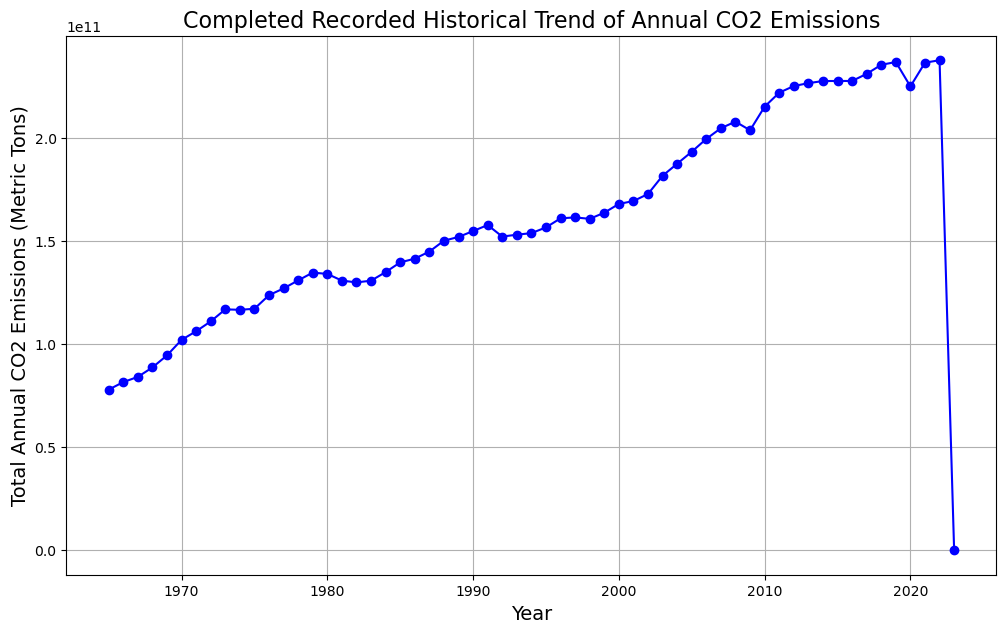

In [101]:
# Displaying the Total Historical Trend of Annual CO2 Emissions, as it is Crucial for Understanding the Modern
## issue of Climate Change - the Final Recorded Year is 2023

# Grouping by Year and sum the Annual CO2 Emissions
annual_co2_trend = df5.groupby('Year')['Annual CO2 Emissions'].sum().reset_index()

# Plotting the Line graph
plt.figure(figsize=(12, 7))
plt.plot(annual_co2_trend['Year'], annual_co2_trend['Annual CO2 Emissions'], marker='o', linestyle='-', color='b')

# Adding Title and Labels
plt.title('Completed Recorded Historical Trend of Annual CO2 Emissions', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Annual CO2 Emissions (Metric Tons)', fontsize=14)

# Show grid
plt.grid()

# Display the plot
plt.show()

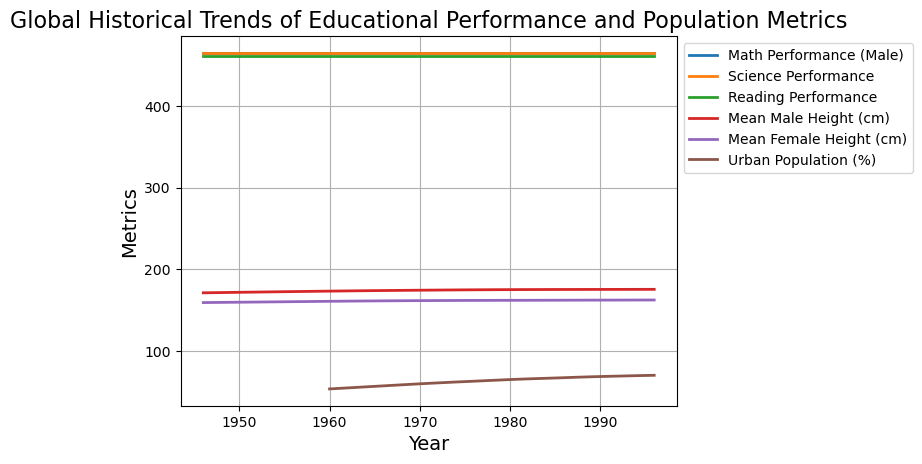

In [5]:
merged = pd.merge(df4, df1, on='Country', suffixes=('_math', '_height'))

# Grouping by 'Year_math' and Calculate the Mean for each relevant Column
averaged = merged.groupby('Year_height').agg({
    'Average performance of 15-year-old male students on the mathematics scale': 'mean',
    'Average performance of 15-year-old students on the science scale': 'mean',
    'Average performance of 15-year-old students on the reading scale': 'mean',
    'Mean male height (cm)': 'mean',
    'Mean female height (cm)': 'mean',
    'Urban Population (% of Total Population)': 'mean'
}).reset_index()

# Filtering for Years after World War 2 ended, to get a more Accurate and Focused Measure
filtered = averaged[averaged['Year_height']>1945]

# Plotting each Metric
## (Unfortunately, for "Math" scores, we only had Males measured from the original Dataset. Thankfully, for the
## other measures, we have combined scores for both Genders)

plt.plot(filtered['Year_height'], 
         filtered['Average performance of 15-year-old male students on the mathematics scale'], 
         label='Math Performance (Male)', linestyle='-', linewidth=2)

plt.plot(filtered['Year_height'], 
         filtered['Average performance of 15-year-old students on the science scale'], 
         label='Science Performance', linestyle='-', linewidth=2)

plt.plot(filtered['Year_height'], 
         filtered['Average performance of 15-year-old students on the reading scale'], 
         label='Reading Performance', linestyle='-', linewidth=2)

plt.plot(filtered['Year_height'], 
         filtered['Mean male height (cm)'], 
         label='Mean Male Height (cm)', linestyle='-', linewidth=2)

plt.plot(filtered['Year_height'], 
         filtered['Mean female height (cm)'], 
         label='Mean Female Height (cm)', linestyle='-', linewidth=2)

plt.plot(filtered['Year_height'], 
         filtered['Urban Population (% of Total Population)'], 
         label='Urban Population (%)', linestyle='-', linewidth=2)

# Adding Title and Labels
plt.title('Global Historical Trends of Educational Performance and Population Metrics', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Metrics', fontsize=14)

# Adding a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show grid
plt.grid()

# Display the plot
plt.show()

In [6]:
# For a Final Correlational Measurement, Merging on "merged"'s "Country" column and "df5"'s' "Entity" column
final = pd.merge(merged, df5, left_on = 'Country', right_on = 'Entity', suffixes=('_merged', '_df5'))

In [9]:
# Removing the "Year" columns and "Freshwater use" column as they will not be Needed nor Useful
final.drop(columns=["Year_math"], inplace=True)
final.drop(columns=["Year_height"], inplace=True)
final.drop(columns=["Year"], inplace=True)
final.drop(columns=["Freshwater use"], inplace=True)

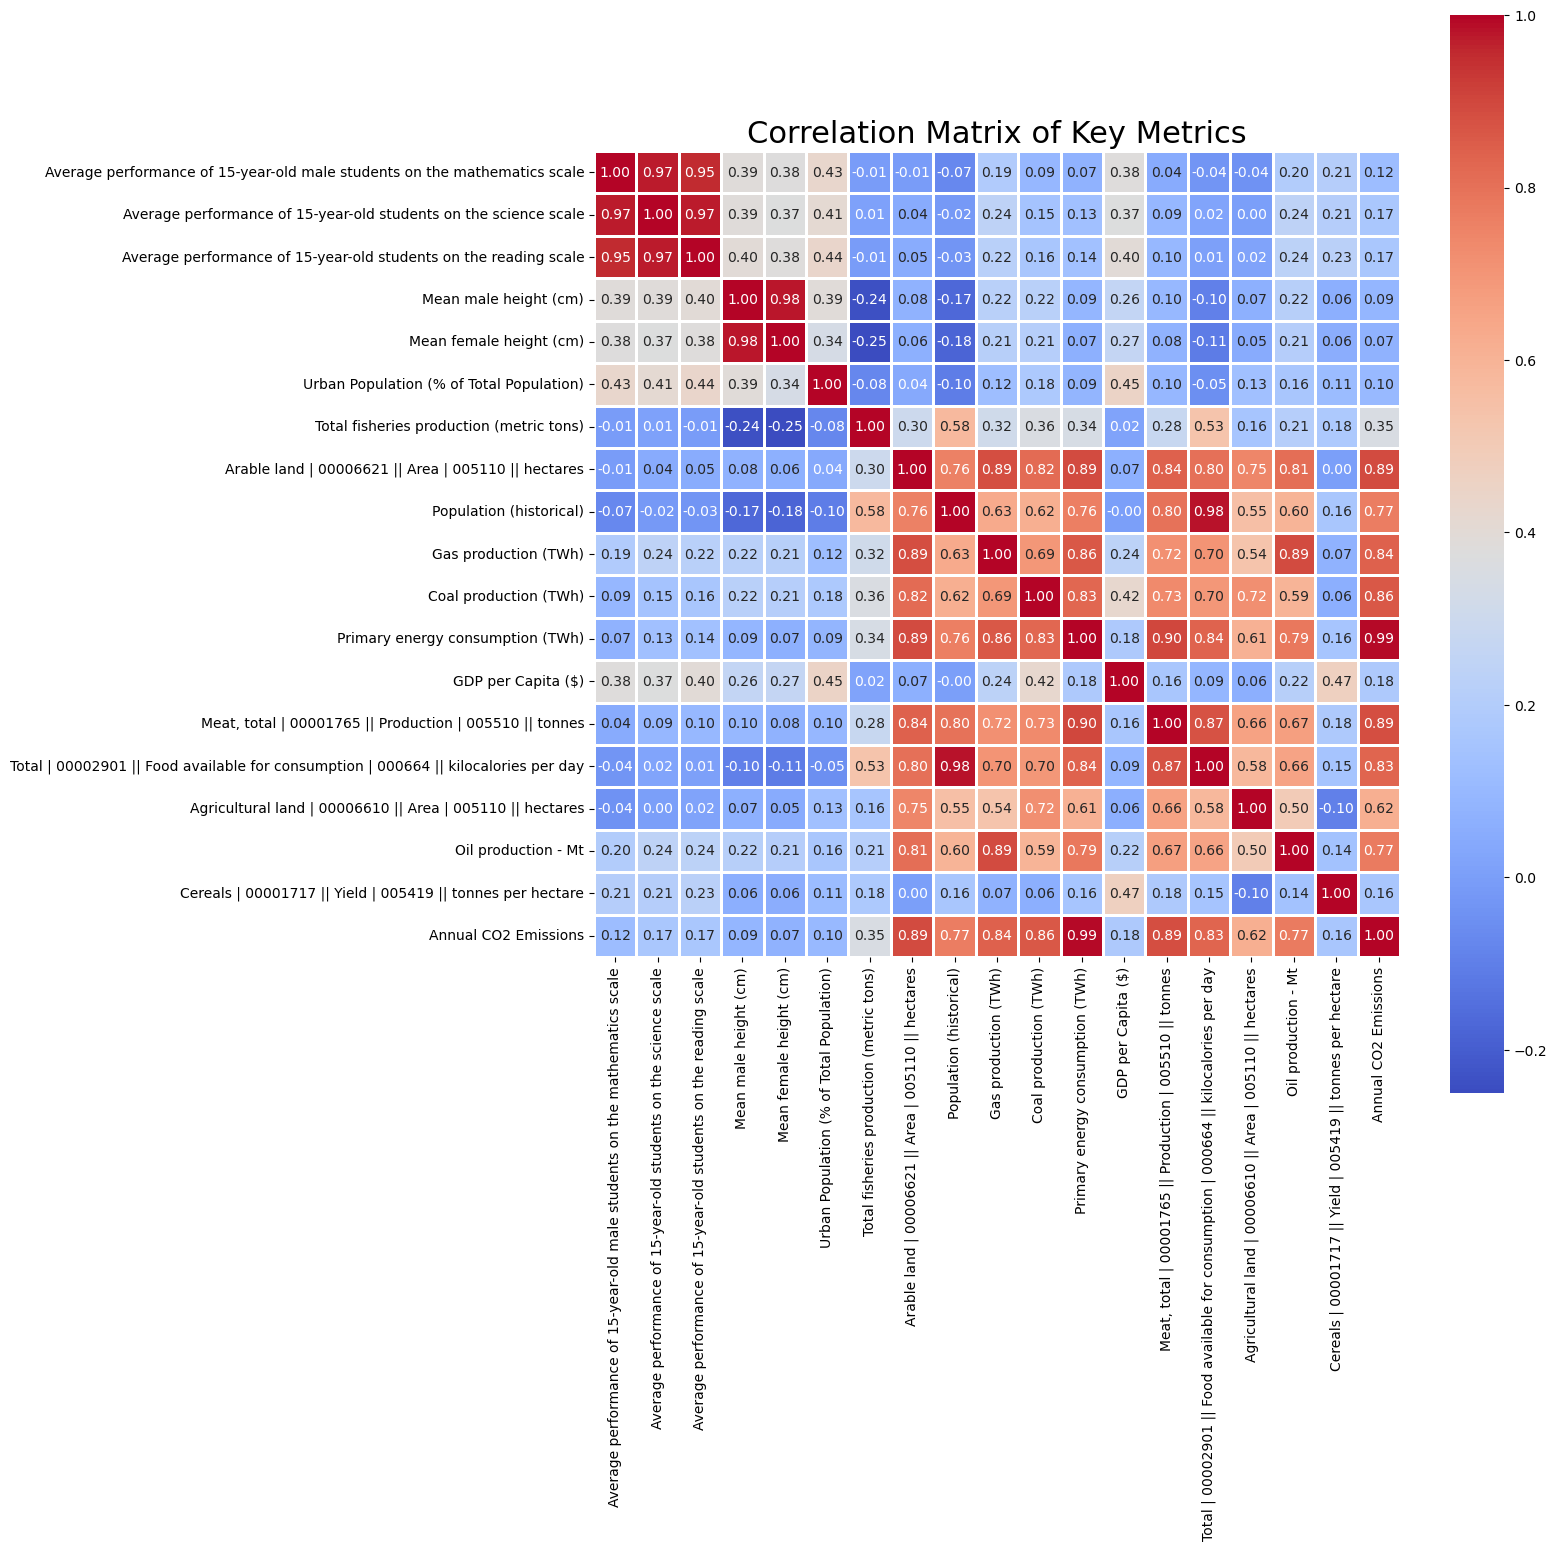

In [86]:
# Finally, Building the Correlation Matrix and Displaying it Beautifully as a Heatmap

numerics_final = final.select_dtypes(include=['float64', 'int64'])

corr_mat = numerics_final.corr().round(3)

plt.figure(figsize=(13, 14)) # Had to Delicately Configure the Size to make a Heatmap which was Finely Adjusted to
## Display Optimally, haha

# Generating a Heatmap with Annotations for the Correlations, and a Color Map
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', linewidths=1.0, square=True)

# Adding a Title to the Plot
plt.title('Correlation Matrix of Key Metrics', fontsize=22)

# Displaying the Plot
plt.show()

In [10]:
# Exporting the Final DataFrame as an Excel file, to use for Subsequent Regression Modeling in R
final.to_csv(r"/Users/alijazibrizvi/Documents/Data Analytics/Self-Project | Social Science & Demography.csv", index=False)